In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly
from plotly.offline import iplot, init_notebook_mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)
from ipywidgets import interact, interact_manual
from dataprep.eda import plot
import datetime
import ipywidgets as widgets
from tqdm import tqdm

In [4]:
df = pd.read_csv("motivation.csv").drop(["Unnamed: 0"], axis=1)

In [9]:
df.describe()

,index,ID,Ich finde Onlineunterricht (alle Schüler/innen/Studierende sind zuhause) im Allgemeinen genauso gut wie normalen Unterricht (Präsenzunterricht). 5 Sterne = trifft voll zu,"Gib an, wie gut deine Bedingungen zum Onlinelernen zuhause sind (Computer, Internet, angenehmer Arbeitsplatz). 5 Sterne = sehr gut",Ich nehme am Onlineunterricht normalerweise über einen Laptop von zuhause aus teil. (5 trifft voll zu),"Gib an, ob der Onlineunterricht für dich im Allgemeinen anstrengender ist als Präsenzunterricht (5 Sterne = trifft voll zu)","Gib an, ob die Arbeitsbelastung für die Schule durch den Onlineunterricht im Allgemeinen zunimmt (5 Sterne = sehr stark)","Hast du den Eindruck, dass ältere Lehrkräfte (>35 Jahre) im Allgemeinen schlechter mit der Gestaltung des Onlineunterrichts zurecht kommen tun als jüngere Lehrkräfte? (5 Sterne= trifft voll zu)","Ich fände es gut, wenn auch in Zukunft ein Teil des Unterrichts online stattfindet (5 Sterne = trifft voll zu)"
count,640.000000,640.000000,637.000000,637.000000,638.000000,639.000000,633.000000,629.000000,621.000000
mean,22.542188,22.846875,3.015699,4.095761,4.355799,3.189358,3.475513,2.823529,3.191626
std,17.648226,17.846283,1.312640,1.025737,1.231605,1.335603,1.212977,1.269066,1.586331
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,2.000000,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000
50%,19.000000,18.000000,3.000000,4.000000,5.000000,3.000000,4.000000,3.000000,3.000000
75%,33.250000,34.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000
max,80.000000,81.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 36 columns):
 #   Column                                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                                               --------------  -----  
 0   index                                                                                                                                                                                                640 non-null    int64  
 1   ID                                                                                                                                                                                                   640 non-null   

Frage Symbole:
F5-9, 16 ,17   s   Stars 1-5
F10-12         w   wichtig 'sehr wichtig', 'wichtig', 'egal', 'nicht wichtig', 'gar nicht wichtig'
F13, 15, Kom.  t   text
F14            m   multiple choice

In [32]:
df_columns=df.columns.tolist()
new_columns=['index', 'ID', 'Startzeit', 'Fertigstellungszeit', 'E-Mail', 'Name', 'Schulform', 'Alter', 'Schulstufe', 'Geschlecht', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10a', 'F10b', 'F10c', 'F11a',
 'F11b', 'F11c', 'F11d', 'F11e', 'F12a', 'F12b', 'F12c', 'F12d', 'F12e', 'F13', 'F14', 'F15', 'F16', 'F17', 'Kommentare', 'Schule', 'Klasse']
df.columns = new_columns

In [39]:
known_schools=['HTL Spengergasse', 'bautechnikum', 'HTL Rennweg', 'TGM', 'hblva17']
df.Schule[df.Schule=='l2']="Andere"
df.Schule[df.Schule.isnull()]="Andere"

In [37]:
plot(df.drop(['index', 'ID', 'Startzeit', 'Fertigstellungszeit', 'E-Mail', 'Name', 'F13', 'F14', 'F15', 'Kommentare', 'Klasse'], axis=1))

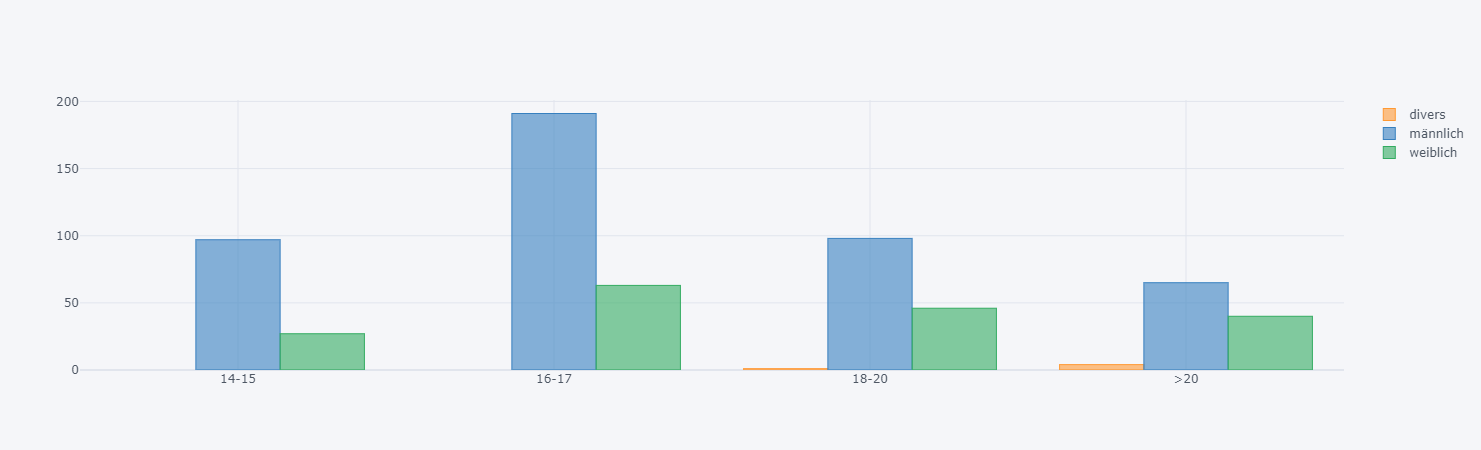

Geschlecht,divers,männlich,weiblich
Alter,,,
14-15,NaN,97.0,27.0
16-17,NaN,191.0,63.0
18-20,1.0,98.0,46.0
>20,4.0,65.0,40.0


In [88]:
d=df[["Alter", "Geschlecht", "ID"]]
d=d.groupby(["Alter", "Geschlecht"]).count().unstack()
d.ID.iplot(kind='bar')
d.ID

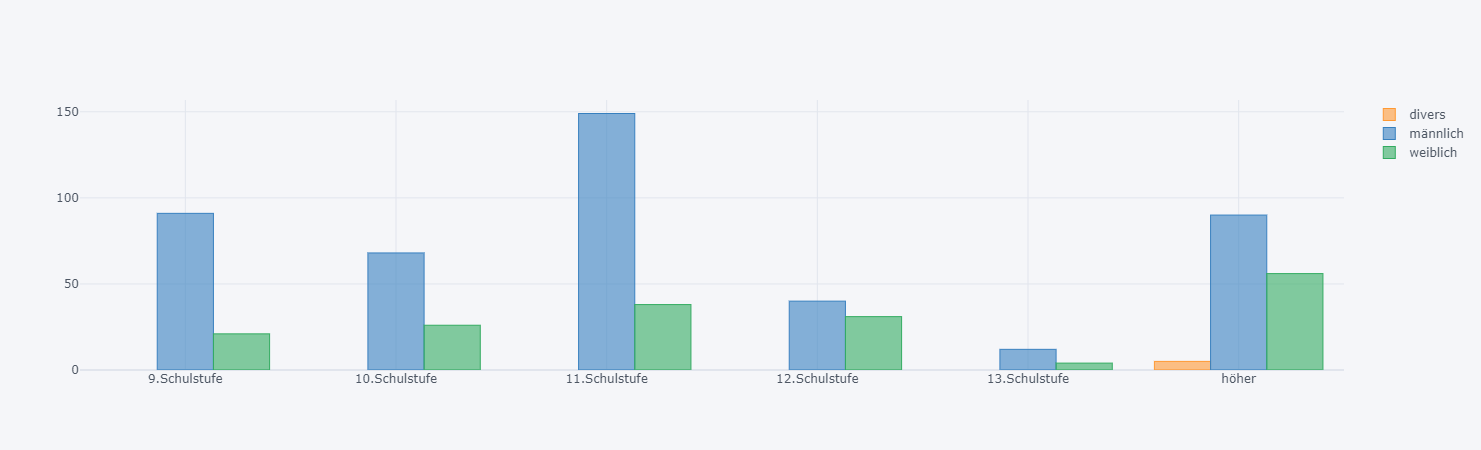

Geschlecht,divers,männlich,weiblich
Schulstufe,,,
9.Schulstufe,NaN,91.0,21.0
10.Schulstufe,NaN,68.0,26.0
11.Schulstufe,NaN,149.0,38.0
12.Schulstufe,NaN,40.0,31.0
13.Schulstufe,NaN,12.0,4.0
höher,5.0,90.0,56.0


In [122]:
d=df[["Schulstufe", "Geschlecht", "ID"]]
d=d.groupby(["Schulstufe", "Geschlecht"]).count().unstack()
d=d.ID
#d.reset_index(inplace=True)
d=d.rename(index={"9": "9.Schulstufe", "10":"10.Schulstufe", "11":"11.Schulstufe", "12":"12.Schulstufe", "13":"13.Schulstufe", ">13":"höher"})
d=d.reindex(index=["9.Schulstufe", "10.Schulstufe", "11.Schulstufe", "12.Schulstufe", "13.Schulstufe", "höher"])
#d.set_index("Schulstufe", inplace=True)
d.iplot(kind='bar')
d